<b style="color:red">Run the cell below before you get started!</b>

In [1]:
from fds import *

Notebook version 7


<h1>Fossil fuels and global temperatures</h1>

For this assignment we will be using data collected by the National Oceanic and Atmospheric Administration (NOAA) and by Carbon Dioxide Information Analysis Center (CDIAC), both US governmental science organizations.

The NOAA data consists of <b>yearly global average temperatures</b>, more specifically, the total land-and-sea global average which combines temperature measurements from both land and sea. The average was around 13 °C in the last century although most datasets subtract this average to work with the deviation instead. This temperature is one of the main indicators for the warming of our planet in very recent history.

The CDIAC dataset (available <a href="https://datahub.io/core/co2-fossil-by-nation#readme">here</a>) lists <b>CO2-emissions from fossil fuels</b>, measured in thousand metric tons of carbon. The original dataset refines this data by nation and by type of fuel (solid, liquid, gas, etc.) but here we will only work with yearly totals.

<div class="task">
    <div class="no">1</div>
    <div class="text">
        The following code cell is supposed to read the dataset contained
    in <code>01-resources/temp-vs-fossil.csv</code> and put the each column
    ("Year", "Temp", "Emissions") into the corresponding lists 
        (<code>years</code>,<code>temps</code>,<code>emissions</code>).
    Complete the code so that it fulfills this task, the subsequent cell
    contains a test that <b>must</b> be passed!
    </div>
</div>

In [2]:
years = []
temps = []
emissions = []

with open('01-resources/temp-vs-fossil.csv', 'r') as f:
    it = iter(f)
    next(it)  # Skip the header row
    for l in it:
        
        row = l.strip().split(',')  
        years.append(int(row[0].strip()))  # assigning the values in the folder with the required variables
        temps.append(float(row[1].strip()))  
        emissions.append(int(row[-1].strip()))  

#checking data in a shorter capacity
print(years[:])
print(temps[:5])
print(emissions[:5])

print(len(years)==len(temps) and len(years)==len(emissions)) # TRUE -> data has no missing values
print(years[0],years[-1]) # the range of the dataset
print(years[-1])
print(temps)


[1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892, 1893, 1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014]
[13.780000000000001, 13.81, 13.8, 13.72, 13.63]
[233049, 240881, 254402, 270544, 273589]
True
1880 2014
2014
[13.780000000000001, 13.81, 13.8, 13.72, 13.63, 13.65, 13.66, 13.620000000000001

In [3]:
### Do not change the code in this cell ###
try:
    assert len(emissions) == len(years) and len(years) == len(temps), "Lists have wrong length"
    check_passed("List lengths okay")
    assert all(isinstance(y, int) for y in years), "`years` data should be integers"
    assert sum(years) == 262845, "`years` data is incorrect"
    check_passed("`years` okay")
    assert all(isinstance(t, float) for t in temps), "`temps` data should be floats"
    assert int(sum(temps)) == 1881, "`temps` data is incorrect"
    check_passed("`temps` okay")
    assert all(isinstance(e, int) for e in emissions), "`emissions` data should be integers"    
    assert sum(emissions) == 386100147, "`emissions` data is incorrect"
    check_passed("`emissions` okay")
    test = [int(sum(e))*(i**2) % 1000 for i,e in enumerate(zip(years,temps,emissions))]
    assert sum(test[::2])-sum(test[1::2]) == -3848, "Lists are in wrong order"
    check_passed("Order okay")
    test_passed('All tests passed!')
except AssertionError as msg:
    error("Test failed", msg)
    pass

✓ List lengths okay
✓ `years` okay
✓ `temps` okay
✓ `emissions` okay
✓ Order okay


**Exercise 2 Answer**

The values provided in the data set were unassigned to any values, therefore making any computations untrackable.

Firstly, we had to order the dataset values by having to split the values and assigning the values to variables by row number(code nr1 in appendix). Once this was done, we could check whether all variables had the same length, and if they did, it meant there was no missing data(code nr2). 

The dataset covered the emissions data from 1880 to 2014 while the data was already sorted. When it comes to the individual data types of values, the years' list contains ordinal values as they represent the periods when the data is tracked. As for temps and emissions, they are numeric in this case as they represent more an amount to be calculated rather than a value to be assessed with. 

Appendix
1. row = l.strip().split(',')  
        years.append(int(row[0].strip()))  
        temps.append(float(row[1].strip()))  
        emissions.append(int(row[-1].strip())) 

2. ```python
print(len(years)==len(temps) and len(years)==len(emissions)) # TRUE -> data has no missing values
```



<div class="task">
    <div class="no">3</div>
    <div class="text"> 
        Complete the code in the next cell to plot the yearly temperatures (x-axis: time, y-axis: temperature).
        Make sure the axes of the plots are labelled correctly. 
    </div>
</div>


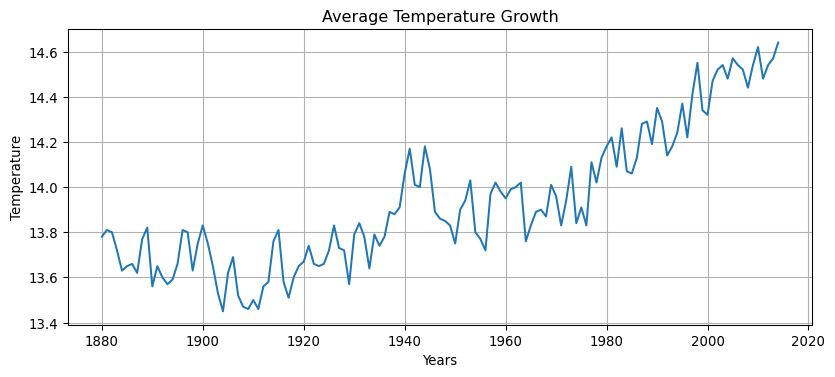

In [4]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,4), dpi=96)

# Complete the code here

plt.plot(years,temps)
plt.xlabel('Years')
plt.ylabel('Temperature')
plt.title('Average Temperature Growth')
plt.grid(True)
# No need to add plt.show(), as it will be a duplicate result



<div class="task">
    <div class="no">4</div>
    <div class="text">Complete the code in the next cell to plot the yearly CO2 emission (x-axis: time, y-axis: emissions).
        Make sure the axes of the plots are labelled correctly.</div>
</div>


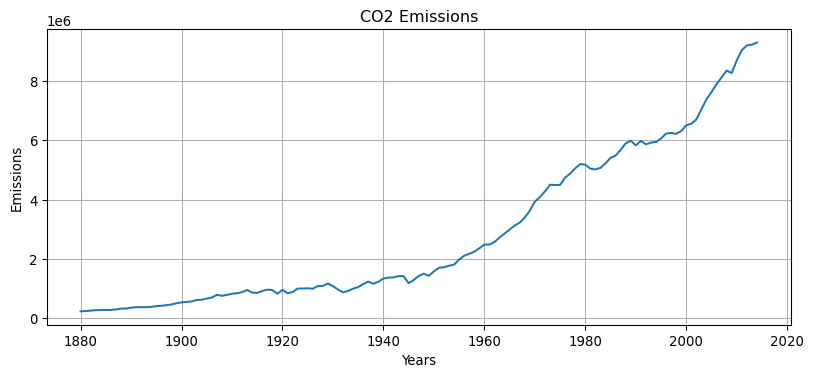

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,4), dpi=96)

# Complete the code here
plt.plot(years,emissions)
plt.xlabel('Years')
plt.ylabel('Emissions')
plt.title('CO2 Emissions')
plt.grid(True)
# No need to add plt.show(), as it will be a duplicate result

<div class="task">
    <div class="no">5</div>
    <div class="text">
        Compute the mean and the variance of <code>temps</code>. 
        Call the resulting variables <code>tmean</code> and <code>tvar</code>.
    </div>
</div>


In [6]:
# Use this cell to compute tmean and tvar
# rounding results for readability, while initial values used for calculations
tmean = sum(temps)/len(temps)
print(f"tmean is {round(tmean,2)}")
tvar = sum((x - tmean)**2 for x in temps) / (len(temps))
print(f"tvar is {round(tvar,3)}")






tmean is 13.93
tvar is 0.093


<div class="task">
    <div class="no">6</div>
    <div class="text">
        Compute the mean and the variance of <code>emissions</code>. 
        Call the resulting variables <code>fmean</code> and <code>fvar</code>.
    </div>
</div>


In [7]:
# Use this cell to compute fmean and fvar
# rounding results for readability, while initial values used for calculations
fmean = sum(emissions)/len(emissions)
print(f"fmean is {round(fmean,2)}")
fvar = (sum((i - fmean)**2 for i in emissions) / (len(emissions)))

print(f"fvar is {round(fvar,3)}")




fmean is 2860001.09
fvar is 6842427381767.991


<div class="task">
    <div class="no">7</div>
    <div class="text">Compute the covariance between <code>temps</code> and <code>emissions</code>.
        Call the resulting variable <code>covar</code>.</div>
</div>

In [8]:
# Use this cell to compute covar
covar = sum(((k - tmean)*(j - fmean)) for k,j in zip(temps,emissions))/ len(temps)
print(f" Covariance = {covar}")


 Covariance = 720182.835652675


If your computations are correct, the <b>test</b> in the following cell should pass.

In [9]:
from IPython.core.display import HTML
try:
    assert isinstance(tmean, float), "`tmean` should be a float"
    assert abs(tmean%10-3.9347) < 0.01, "Value of `tmean` is wrong"
    check_passed("`tmean` okay")
    assert isinstance(tvar, float), "`tvar` should be a float"    
    assert abs(tvar%10 - 0.09346) < 0.001, "Value of `tvar` is wrong"
    check_passed("`tvar` okay")    
    assert isinstance(fmean, float), "`fmean` should be a float"
    assert abs(fmean%10-1.088) < 0.001, "Value of `fmean` is wrong"
    check_passed("`fmean` okay")
    assert isinstance(fvar, float), "`fvar` should be a float"    
    assert abs(fvar%10 - 7.9912) < 0.001, "Value of `fvar` is wrong"
    check_passed("`fvar` okay")
    assert isinstance(covar, float), "`covar` should be a float"    
    assert abs(covar%10 - 2.83565) < 0.001, "Value of `covar` is wrong"
    check_passed("`covar` okay")
    test_passed('All tests passed!')
except AssertionError as msg:
    error("Test failed", msg)
    pass

✓ `tmean` okay
✓ `tvar` okay
✓ `fmean` okay
✓ `fvar` okay
✓ `covar` okay


<div class="task">
    <div class="no">8</div>
    <div class="text">Given the values <code>covar</code>, <code>fvar</code>, and <code>tvar</code> compute the Pearson correlation coefficient for CO2 emissions by fossil fuels and the planetary temperature. <b>Interpret the resulting value</b> (~100 words) and describe what the Pearson correlation coefficients measures.
    </div>
</div>

In [10]:
# Use this cell to compute and output the correlations coefficient

from math import sqrt # only sqrt function imported from the math module, as only sqrt was required

r_xy = covar / (sqrt((sum((k - tmean)**2 for k in temps)/ len(temps))*(sum((j - fmean)**2 for j in emissions)/ len(emissions)))) #or covar / sqrt((fvar) * (tvar))

print(f" Correlation Coefficient = {r_xy}")


 Correlation Coefficient = 0.9005471067068569


**Exercise 8 Answer**

The covariance between the temperatures and emissions was quite large, skewing the posibility of a linear relationship due to the the high magnitude. 

To normalise the relationship, we need to calculate the Pearson's Correlation Coefficient which can prove the linear relationship. The R(correlation coefficient) is ~ 0.9, which suggests a strong linear relationship between the rising global temperatures and CO2 emissions.

The coefficient describes the strength of the linear relationships between 2 variables. There are 3 outcomes: firstly R is closer to 1 which describes a positive linear relationship, secondly, R is closer to -1 which describes a negative linear relationship. Lastly, the correlation coefficient is close to 0 meaning no linear relationship. 

<div class="task">
    <div class="no">9</div>
    <div class="text">
        If you passed the above tests, the cell below should output a scatter plot
        of fossil fuel emission against global mean temperatures as well as a linear
        regression of these two variables. <b>Describe and interpret this plot</b> (~200 words). 
        Feel free to quote external sources to supplement information.
    </div>
</div>


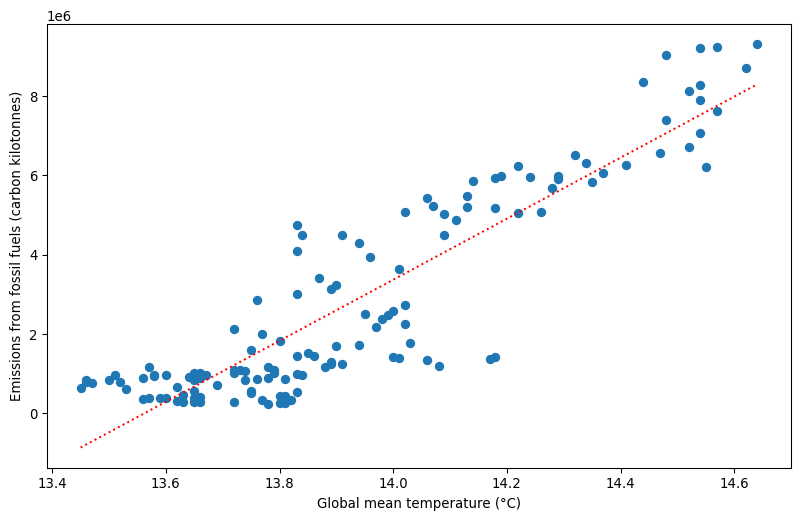

In [11]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10,6), dpi=96)

xs, ys = temps, emissions
plt.scatter(xs, ys)


a = covar / tvar

b = fmean - a * tmean


xmin, xmax = min(xs), max(xs)
plt.xlabel('Global mean temperature (°C)')
plt.ylabel('Emissions from fossil fuels (carbon kilotonnes)')
plt.plot([xmin,xmax], [a*xmin + b, a*xmax + b], color='red', ls=":")

pass

**Exercise 9 Answer**

The plot above portrays the linear relationship between the global mean temperature and rising global emissions, which is calculated via the formula *y = ax+b*, where *x* defines the temperature and *y* the emissions. The red line defines the increasing trend starting from its first point at [*xmin,a*xmin + b*] and ending at [*xmax, a*xmax + b*]. 

By first looking at the plot we can notice the slope of line (a) which increases from degree to degree by ~7705135 carbon kilotonnes. The slope of the line was calculated by dividing the covariance with the temperature variance.

Initially, some doubts might arise when seeing the initial scatter plot. The bottom left corner of the plot seems, to the naked eye, to have a larger variance. This is interesting considering that the variance for temperatures before 1950 is 0.023, while after is 0.041, meaning that the temperatures were more volatile after the 50's. The set was split into 2 subsets to bring this example, first set contained 71 values and the second 64.

Overall, the linear regression of this plot is positive which indicates that as emissions rise the global mean temperature does too. Despite this fact, this relationship does not imply causation as there might be other factors that can affect the global mean temperature.

